In [20]:
import numpy as np

# グリッドの定義
grid = np.zeros((5, 5))
grid[4, 4] = 1  # ゴール位置
grid[2, 2] = -1  # 障害物

q_table = np.zeros((5,5,4))

In [21]:
grid

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [22]:
print(q_table), print(q_table.shape)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
(5, 5, 4)


(None, None)

In [23]:
alpha = 0.1
gamma = 0.9
epsilon = 0.2

actions ={
    0: (-1, 0),  # up
    1: (1, 0),  # down
    2: (0, -1),  # left
    3: (0, 1)  # right
}

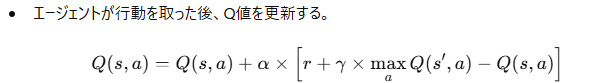

In [24]:
def update_q_table(state, action, reward, next_state):
    global q_table
    old_value = q_table[state][action]
    next_max = np.max(q_table[next_state])
    new_value = q_table[state][action] = old_value + alpha * (reward + gamma * next_max - old_value)
    q_table[state][action] = new_value

def apply_action(state,action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= 5 or next_state[1] < 0 or next_state[1] >= 5:
        next_state = state
    return next_state

In [25]:
for episode in range(10000):
    state = (0,0)
    for step in range(100):
        if np.random.rand() < epsilon:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(q_table[state])

        next_state = apply_action(state, action)
        reward = grid[next_state]

        update_q_table(state,action,reward,next_state)
        state = next_state
        if reward == 1:
            break
               
        

In [29]:
# 行動の矢印表現
action_presentation = ["↑", "↓", "←", "→"]

# アクショングリッドの初期化
action_grid = [["" for _ in range(5)] for _ in range(5)]

for i in range(5):
    for j in range(5):
        state = (i, j)
        print(f"State: ({i}, {j})")
        print(q_table[i, j])  # 状態のQ値を表示

        if grid[i, j] == 1:  # ゴール
            action_grid[i][j] = "G"
        elif grid[i, j] == -1:  # 障害物
            action_grid[i][j] = "X"
        else:
            action = np.argmax(q_table[i, j])  # 最大のQ値を持つ行動を取得
            action_grid[i][j] = action_presentation[action]

# アクショングリッドの表示
for row in action_grid:
    print(" ".join(row))



State: (0, 0)
[4.30837127 4.78707919 4.30837127 4.78707919]
State: (0, 1)
[4.78091316 5.31897687 4.30837127 5.30096669]
State: (0, 2)
[5.1078078  5.9099743  4.45770175 5.81562886]
State: (0, 3)
[5.8214334  6.56663812 5.27615851 5.09910617]
State: (0, 4)
[2.97870659 3.6357633  5.90894477 1.00975347]
State: (1, 0)
[4.30837127 4.30837127 4.78707919 5.31897687]
State: (1, 1)
[4.78707919 4.78707919 4.78707919 5.9099743 ]
State: (1, 2)
[ 5.31897687 -3.43336188  5.31897687  6.56663812]
State: (1, 3)
[5.9099743  7.29626457 5.9099743  7.29626457]
State: (1, 4)
[5.26212685 8.10696064 6.56663812 7.24600928]
State: (2, 0)
[4.78707919 3.18287074 4.09532407 4.48896471]
State: (2, 1)
[ 5.31897687  4.236304    4.2112317  -3.45750738]
State: (2, 2)
[5.8953962  7.25602358 4.78295011 7.29626457]
State: (2, 3)
[ 6.56663812  8.10696064 -3.43336188  8.10696064]
State: (2, 4)
[7.29626457 9.00773404 7.29626457 8.10696064]
State: (3, 0)
[ 8.15390056e-01  4.43413684e-02 -2.23051045e-03  4.08858654e+00]
State: (

In [28]:
# 学習パラメータ
alpha = 0.1
gamma = 0.9
epsilon = 0.2

# 行動の定義
actions = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# 報酬の設定
grid = np.zeros((5, 5))
grid[4, 4] = 10  # ゴールの報酬
grid[2, 2] = -10  # 障害物のペナルティ

# Qテーブルの初期化（ランダム初期化）
q_table = np.random.uniform(-0.01, 0.01, (5, 5, 4))

def update_q_table(state, action, reward, next_state):
    """Q値の更新"""
    global q_table
    old_value = q_table[state[0], state[1], action]
    next_max = np.max(q_table[next_state[0], next_state[1]])
    q_table[state[0], state[1], action] = old_value + alpha * (reward + gamma * next_max - old_value)

def apply_action(state, action, actions):
    """行動を適用して次の状態を返す"""
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= 5 or next_state[1] < 0 or next_state[1] >= 5:
        next_state = state  # 境界外なら元の状態を維持
    return next_state

# エージェントの学習ループ
for episode in range(10000):  # エピソード数を増加
    state = (0, 0)  # 開始状態
    while state != (4, 4):  # ゴールに到達するまでループ
        if np.random.rand() < epsilon:  # ランダム行動（探索）
            action = np.random.choice(list(actions.keys()))
        else:  # 最大Q値に基づく行動（活用）
            action = np.argmax(q_table[state[0], state[1]])

        next_state = apply_action(state, action, actions)
        reward = grid[next_state[0], next_state[1]]
        update_q_table(state, action, reward, next_state)
        state = next_state
